# Red_Maple_Breaking_Bloom Data

In [23]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from scipy import stats

# from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Open file and load data

In [25]:
# load csv file
original_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/herb flower data/red maples/Pheno_Red_Maple_Breaking_Lvs_NE_USA.csv')

In [26]:
# create a copy of data
df = original_data.copy()


In [27]:
# view the first few entries of the data
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,Breaking_Lvs_Min_DOY
0,Acer,rubrum,2,Home,ME,2011,117
1,Acer,rubrum,2,Home,ME,2012,83
2,Acer,rubrum,2,Home,ME,2013,114
3,Acer,rubrum,2,Home,ME,2014,125
4,Acer,rubrum,2,Home,ME,2015,124


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Genus                 545 non-null    object
 1   Species               545 non-null    object
 2   Site_ID               545 non-null    int64 
 3   Site_Name             545 non-null    object
 4   State                 545 non-null    object
 5   Year                  545 non-null    int64 
 6   Breaking_Lvs_Min_DOY  545 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 29.9+ KB


In [29]:
df['Genus'].unique()

array(['Acer'], dtype=object)

In [30]:
df['Species'].unique()

array(['rubrum'], dtype=object)

In [31]:
site_list = df['Site_Name'].unique()
print('There are',len(site_list),'unique sites')

There are 63 unique sites


## Map each plant name to the associated subset of data

In [32]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# for each category group observed in df, map the associated data to the category group
for site in site_list:

  categorized_data.update({site:df[df['Site_Name'] == site].dropna()})


## Visualize and Example

In [33]:
# view data associated with a given Site_Name
example_data = categorized_data.get('Home')

# view data
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,Breaking_Lvs_Min_DOY
0,Acer,rubrum,2,Home,ME,2011,117
1,Acer,rubrum,2,Home,ME,2012,83
2,Acer,rubrum,2,Home,ME,2013,114
3,Acer,rubrum,2,Home,ME,2014,125
4,Acer,rubrum,2,Home,ME,2015,124
5,Acer,rubrum,2,Home,ME,2016,121
61,Acer,rubrum,1904,Home,MN,2017,127
62,Acer,rubrum,1904,Home,MN,2018,120
63,Acer,rubrum,1904,Home,MN,2019,131
64,Acer,rubrum,1904,Home,MN,2020,135


## Run a regression on the example data:

<Axes: xlabel='Year', ylabel='Breaking_Lvs_Min_DOY'>

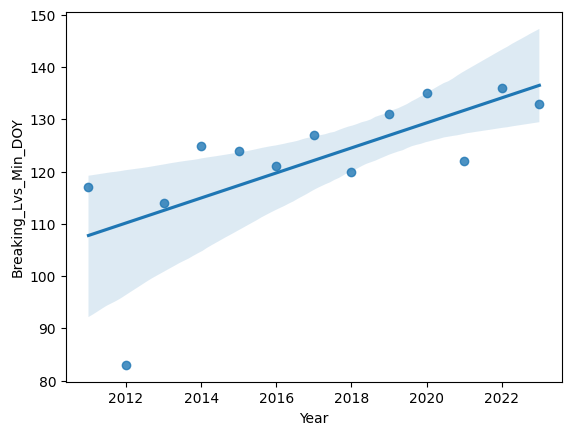

In [34]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['Breaking_Lvs_Min_DOY'])

## Now let's get the correlation coefficient

In [35]:
x=example_data['Year']
y=example_data['Breaking_Lvs_Min_DOY']

round(x.corr(y), 4)

0.686

## Since there are 63 uique Site, rather than visualize them all
## Let's just perform the regression, calculate the reevant stats and store the results


In [36]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
results = []
results2 = []

# loop through all unique catgory groupings
for category in site_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['Breaking_Lvs_Min_DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(x) > 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))


correlation_df = pd.DataFrame({
    'grouping':category_groups,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


# Red_Maple_Breaking_Bloom Regression Data:

In [37]:
# drop all rows containing NaN values (these seem to usually result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view catergories & correlation
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

                                               grouping  Pearson r  Kendall τ    slope      R²  p-value
0                                                  Home     0.6860     0.5897   2.3956  0.4706   0.0111
1                                           PPN_9200010     0.0199    -0.0645    0.044  0.0004   0.9878
2                                           PPN_9239908     0.3114     0.1952   1.1466  0.0970   0.5133
4                                              backyard     0.2458     0.0402   0.9163  0.0604   0.2985
5                                       Spicebush_Trail    -0.3630    -0.2462  -1.3716  0.1318   0.2315
6                                    Cary_Institute_PSB    -0.4924    -0.3670  -1.1273  0.2424   0.1087
7                                          Bridge_Trail    -0.6992    -0.4545  -3.2733  0.4889   0.0107
8                Beckman_Lake_Highland_Cedar_Creek_LTER     0.5636     0.3890   1.8941  0.3176   0.0786
9                       PhenoCAM_tower_Cedar_Creek_LTER     0.50

In [38]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pearson r,61.0,-0.012059,0.449671,-0.7279,-0.4646,0.0403,0.3663,0.7796
Kendall τ,61.0,-0.020238,0.340767,-0.8000,-0.3333,0.0308,0.2444,0.5897
R²,61.0,0.199038,0.173479,0.0000,0.0410,0.1618,0.3282,0.6078
p-value,61.0,0.403841,0.306936,0.0107,0.1473,0.2985,0.6209,0.9878


# Let's reduce our results to groupings that saw a p-value < .1
## Sorted by p-value


In [39]:
significant = correlation_df[correlation_df['p-value']<.10].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

                                               grouping  Pearson r  Kendall τ   slope      R²  p-value
7                                          Bridge_Trail    -0.6992    -0.4545 -3.2733  0.4889   0.0107
0                                                  Home     0.6860     0.5897  2.3956  0.4706   0.0111
43                                            Back_Yard     0.7796     0.4444  2.2306  0.6078   0.0149
14                                         First_Meadow    -0.7279    -0.4880 -2.6407  0.5298   0.0598
40                             Cary_Institute_Fern_Glen    -0.6020    -0.4045 -1.9273  0.3624   0.0599
18                                              My_yard     0.6220     0.4319   1.225  0.3869   0.0658
56                                                 home    -0.7083    -0.6190    -2.5  0.5016   0.0703
19  Rachel_Carson_National_Wildlife_Refuge_Headquarters    -0.5538    -0.5138 -3.2477  0.3067   0.0726
8                Beckman_Lake_Highland_Cedar_Creek_LTER     0.5636     0.

### Descriptive Statistics of Instance with p-value < .10:

In [40]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
Pearson r,11.0,-0.044727,0.697538,-0.7279,-0.65060,-0.5538,0.65400,0.7796
Kendall τ,11.0,-0.047609,0.502505,-0.6190,-0.47125,-0.4002,0.43815,0.5897
R²,11.0,0.444318,0.102543,0.3067,0.36025,0.4706,0.51570,0.6078
p-value,11.0,0.055927,0.029525,0.0107,0.03735,0.0658,0.07560,0.0918


## Broken Down By Slope

In [41]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.to_string())

                                  grouping  Pearson r  Kendall τ   slope      R²  p-value
18                                 My_yard     0.6220     0.4319   1.225  0.3869   0.0658
8   Beckman_Lake_Highland_Cedar_Creek_LTER     0.5636     0.3890  1.8941  0.3176   0.0786
43                               Back_Yard     0.7796     0.4444  2.2306  0.6078   0.0149
0                                     Home     0.6860     0.5897  2.3956  0.4706   0.0111
11                         Mirror_Lake_NBG     0.7464     0.5013  2.7857  0.5571   0.0918


# Negative Slope:

In [42]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.to_string())

                                               grouping  Pearson r  Kendall τ   slope      R²  p-value
7                                          Bridge_Trail    -0.6992    -0.4545 -3.2733  0.4889   0.0107
19  Rachel_Carson_National_Wildlife_Refuge_Headquarters    -0.5538    -0.5138 -3.2477  0.3067   0.0726
14                                         First_Meadow    -0.7279    -0.4880 -2.6407  0.5298   0.0598
56                                                 home    -0.7083    -0.6190    -2.5  0.5016   0.0703
40                             Cary_Institute_Fern_Glen    -0.6020    -0.4045 -1.9273  0.3624   0.0599
15                                     Big_Meadow_North    -0.5984    -0.4002    -1.6  0.3581   0.0797


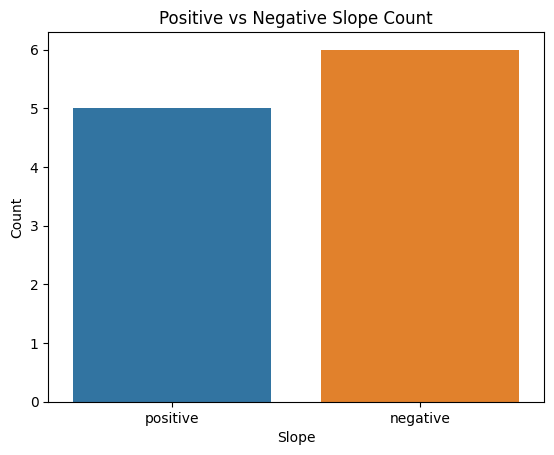

Number of positive slope examples: 5
Number of negative slope examples: 6


In [43]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 11, out of the original 61, groupings showed a statistically significant (p < .10) relationship between year and Breaking_Lvs_Min_DOY
##5 have a positive slope
##6 have a negative slope